In [1]:
import numpy as np

from rfest import GLM
from rfest.utils import fetch_data, split_data, get_n_samples
from rfest.check import plot1d, plot_diagnostics

In [2]:
data = fetch_data(data=3, datapath='./data/')

(Uzzell & Chichilnisky, 2004) is already downloaded. To re-download the same file, please set `overwrite=False`.
Loading data...
Done.


In [10]:
len(stim)

144051

In [19]:
stim = data['Stim']
stimtime = data['stimtimes'].flatten()
spiketime = data['SpTimes']

cellnum = 2
sps = []
for i in range(4):
    tsp = spiketime[0][i].flatten()

    dt = (stimtime[1] - stimtime[0]) # time bin size for stimulus (s)
    n_total = len(stim) # number of time bins in stimulus
    n_spikes = len(tsp) # number of spikes
    tbins = np.arange(0, n_total) * dt # bin centers
      # but here in numpy we specified the bin edges
    tbins -= np.diff(np.hstack([0, tbins])) / 2
    sps_, t = np.histogram(tsp, bins=len(tbins), range=(tbins[0], tbins[-1]))
    sps.append(sps_)
    
dims = [25, ]
n_subset = get_n_samples(10, dt) # use 5 mintues for training
# # Xdsgn = build_design_matrix(stim[:, np.newaxis], dims[0])[:n_subset]
X = stim[:n_subset]
ys = []
for i in range(4):
    ys.append(sps[i][:n_subset])

frac_train = 0.5
(X_train, y_train), (X_dev, y_dev), (X_test, y_test) = split_data(X, ys[2], dt, frac_train=frac_train, frac_dev=0.05)

(_, y_train_c_1), (_, y_dev_c_1), (_, y_test_c_1) = split_data(X, ys[1], dt, frac_train=frac_train, frac_dev=0.05)
(_, y_train_c_2), (_, y_dev_c_2), (_, y_test_c_2)= split_data(X, ys[0], dt, frac_train=frac_train, frac_dev=0.05)
(_, y_train_c_3), (_, y_dev_c_3), (_, y_test_c_3) = split_data(X, ys[3], dt, frac_train=frac_train, frac_dev=0.05)

SUMMARY
               N    Minutes   Fraction
Total      71937       10.0        1.0
Train      35969        5.0        0.5
Dev         3597        0.5       0.05
Test       32371        4.5       0.45
SUMMARY
               N    Minutes   Fraction
Total      71937       10.0        1.0
Train      35969        5.0        0.5
Dev         3597        0.5       0.05
Test       32371        4.5       0.45
SUMMARY
               N    Minutes   Fraction
Total      71937       10.0        1.0
Train      35969        5.0        0.5
Dev         3597        0.5       0.05
Test       32371        4.5       0.45
SUMMARY
               N    Minutes   Fraction
Total      71937       10.0        1.0
Train      35969        5.0        0.5
Dev         3597        0.5       0.05
Test       32371        4.5       0.45


In [20]:
m = []
df = [13,]
shift= 1
m = GLM(distr='poisson',  output_nonlinearity='exponential')

# # training set
m.add_design_matrix(X_train, dims=[25,], df=df, smooth='cr', filter_nonlinearity='none', name='stimulus', kind='train')
m.add_design_matrix(y_train, dims=[20,],  shift=shift, filter_nonlinearity='none', name='history', kind='train')
m.add_design_matrix(y_train_c_1, dims=[20,], df=df, smooth='cr', shift=shift, name='couple1', kind='train') 
m.add_design_matrix(y_train_c_2, dims=[20,], df=df, smooth='cr', shift=shift, name='couple2', kind='train') 
m.add_design_matrix(y_train_c_3, dims=[20,], df=df, smooth='cr', shift=shift, name='couple3', kind='train')

# # dev set
m.add_design_matrix(X_dev, name='stimulus', kind='dev')
m.add_design_matrix(y_dev, name='history', kind='dev')
m.add_design_matrix(y_dev_c_1, name='couple1', kind='dev')
m.add_design_matrix(y_dev_c_2, name='couple2', kind='dev')
m.add_design_matrix(y_dev_c_3, name='couple3', kind='dev')

m.initialize(y={'train': y_train, 'dev': y_dev}, num_subunits=1, dt=dt, method='mle', random_seed=2015)

m.fit(metric='corrcoef', num_iters=600, verbose=100, step_size=0.01, beta=1.)

Iters	  Time (s)	Cost (train)	Cost (dev)	corrcoef (train)	corrcoef (dev)
    0	     0.796	 58435.968	  5406.381	     0.182	     0.110
  100	     2.266	 20424.804	  2106.718	     0.526	     0.463
  200	     3.712	 18996.786	  1961.954	     0.598	     0.542
  300	     5.151	 18086.237	  1871.735	     0.647	     0.597
  400	     7.433	 17465.409	  1811.916	     0.681	     0.636
  500	     9.733	 17024.579	  1771.297	     0.704	     0.664
Stop: reached 600 steps.



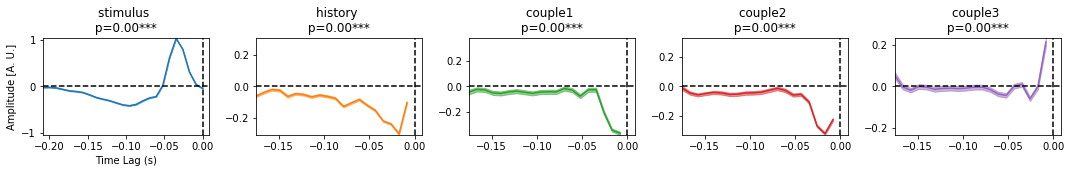

In [21]:
plot1d(m)

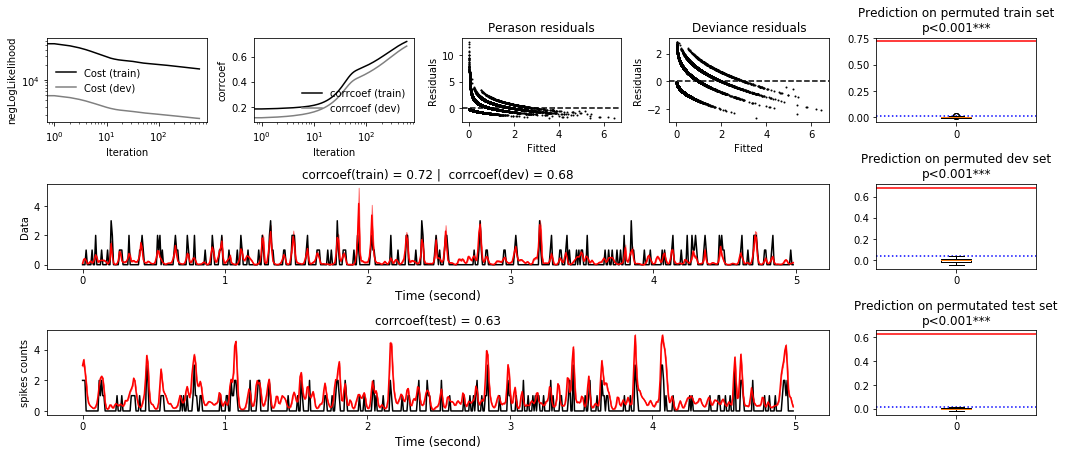

In [23]:
plot_diagnostics(m, X_test, y_test, display_window=5)